In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls -al

total 829864
drwxr-xr-x@ 207 amosfang  staff     6624 Dec  5 18:23 .
drwxr-xr-x   12 amosfang  staff      384 Dec  5 15:37 ..
-rw-r--r--@   1 amosfang  staff     6148 Dec  5 17:39 .DS_Store
drwxr-xr-x    3 amosfang  staff       96 Dec  5 17:06 .ipynb_checkpoints
-rwxr-xr-x@   1 amosfang  staff  2109578 Feb  8  2021 100u.csv
-rwxr-xr-x@   1 amosfang  staff  2115842 Feb  8  2021 100v.csv
-rwxr-xr-x@   1 amosfang  staff  2128427 Feb  8  2021 10u.csv
-rwxr-xr-x@   1 amosfang  staff  2103138 Feb  8  2021 10v.csv
-rwxr-xr-x@   1 amosfang  staff  2125998 Feb  8  2021 11u.csv
-rwxr-xr-x@   1 amosfang  staff  2102463 Feb  8  2021 11v.csv
-rwxr-xr-x@   1 amosfang  staff  2115799 Feb  8  2021 12u.csv
-rwxr-xr-x@   1 amosfang  staff  2100889 Feb  8  2021 12v.csv
-rwxr-xr-x@   1 amosfang  staff  2108139 Feb  8  2021 13u.csv
-rwxr-xr-x@   1 amosfang  staff  2100321 Feb  8  2021 13v.csv
-rwxr-xr-x@   1 amosfang  staff  2114122 Feb  8  2021 14u.csv
-rwxr-xr-x@   1 amosfang  staff  2112573 Feb  8  2021

## Problem 1 a.

In [3]:
time_lapse = []

for time in range(1, 101):
    df_u = pd.read_csv(f'{time}u.csv', header=None)
    u = df_u.to_numpy()
    
    df_v = pd.read_csv(f'{time}v.csv', header=None)
    v = df_v.to_numpy()
    
    uv_array = np.stack((u, v), axis=2)
    
    time_lapse.append(uv_array)

In [4]:
time_lapse = np.array(time_lapse)
print(time_lapse.shape)

(100, 504, 555, 2)


In [5]:
mag_array = []

for t in range(100):
    magnitude = np.sqrt(time_lapse[t,:,:,0]**2 + time_lapse[t,:,:,1]**2)
    mag_array.append(magnitude)

mag_array = np.array(mag_array)
print(mag_array.shape)

(100, 504, 555)


In [6]:
variance_along_samples = np.var(mag_array, axis=0, ddof=1)

variance_along_samples

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.35126818e-03, 8.47009560e-04, 9.41913006e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.83828757e-03, 6.62025126e-04, 7.35767674e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.86857615e-04, 2.83343950e-04, 3.14896297e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
print(variance_along_samples.shape)

(504, 555)


In [52]:
mask_array = pd.read_csv('mask.csv', header=None).to_numpy()

mask_array *= 255

print(mask_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


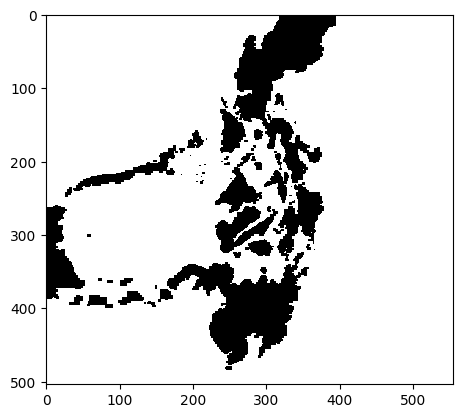

In [53]:
import matplotlib.pyplot as plt

# # Create a heatmap
plt.imshow(mask_array, cmap='gray', interpolation='nearest')

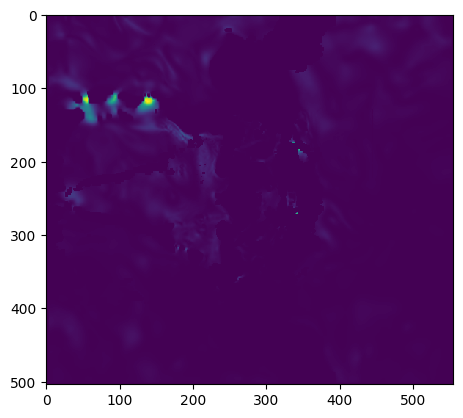

In [51]:
# Create a heatmap
x = np.multiply(variance_along_samples, mask_array)
plt.imshow(x, cmap='viridis', interpolation='nearest')

In [11]:
x[x == 0] = 9999

In [12]:
# Find the position of the minimum value
min_pos = np.unravel_index(np.argmin(x), x.shape)

min_pos

(121, 170)

In [13]:
x[min_pos]

1.242184822090329e-13

## Problem 1 b.

In [14]:
from matplotlib.animation import FuncAnimation

# Assuming 'data' is your NumPy array of shape (100, 504, 555)
data = mag_array  # Example data

# Function to update the plot for each frame
def update(frame):
    plt.clf()  # Clear the previous frame
    plt.imshow(data[frame], cmap='viridis', interpolation='nearest')
    plt.title(f'Time Step: {frame}')
    plt.colorbar()

# Create an animation
animation = FuncAnimation(plt.gcf(), update, frames=range(100), interval=100, repeat=False)

# Display the animation
plt.show()

<Figure size 640x480 with 0 Axes>

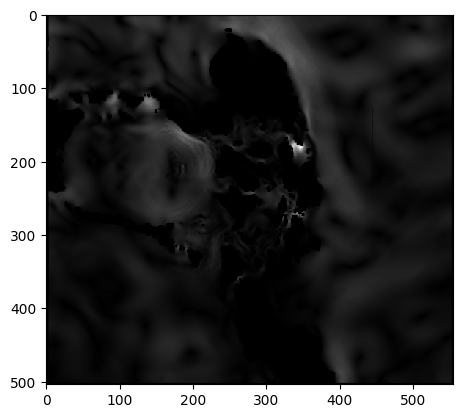

In [15]:
# Create a heatmap
plt.imshow(mag_array[30,:,:], cmap='gray', interpolation='nearest')

In [16]:
print(time_lapse.shape)

(100, 504, 555, 2)


In [17]:
print(time_lapse[:,:,:,1].shape)

(100, 504, 555)


In [18]:
# Find the position of the minimum value
max_pos = np.unravel_index(np.argmax(time_lapse[:,:,:,0]), time_lapse[:,:,:,0].shape)

max_pos

(28, 181, 347)

In [19]:
time_lapse[:,:,:,1][max_pos]

1.0951

In [20]:
print(np.mean(time_lapse[:,:,:,0], axis=0).shape)

(504, 555)


In [21]:
print(time_lapse[:,:,:,1].shape)

(100, 504, 555)


In [22]:
print(np.mean(time_lapse[:,:,:,0]))

-0.09366228934616833


In [23]:
print(np.mean(time_lapse[:,:,:,1]))

-0.03548388738810676
